In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adidas-vs-nike/Adidas Vs Nike.csv


In [4]:
# basic operations
import numpy as np
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [6]:
df= pd.read_csv("../input/adidas-vs-nike/Adidas Vs Nike.csv")
df

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15
...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13T15:41:03
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13T15:41:07
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13T15:41:19


In [17]:
df.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


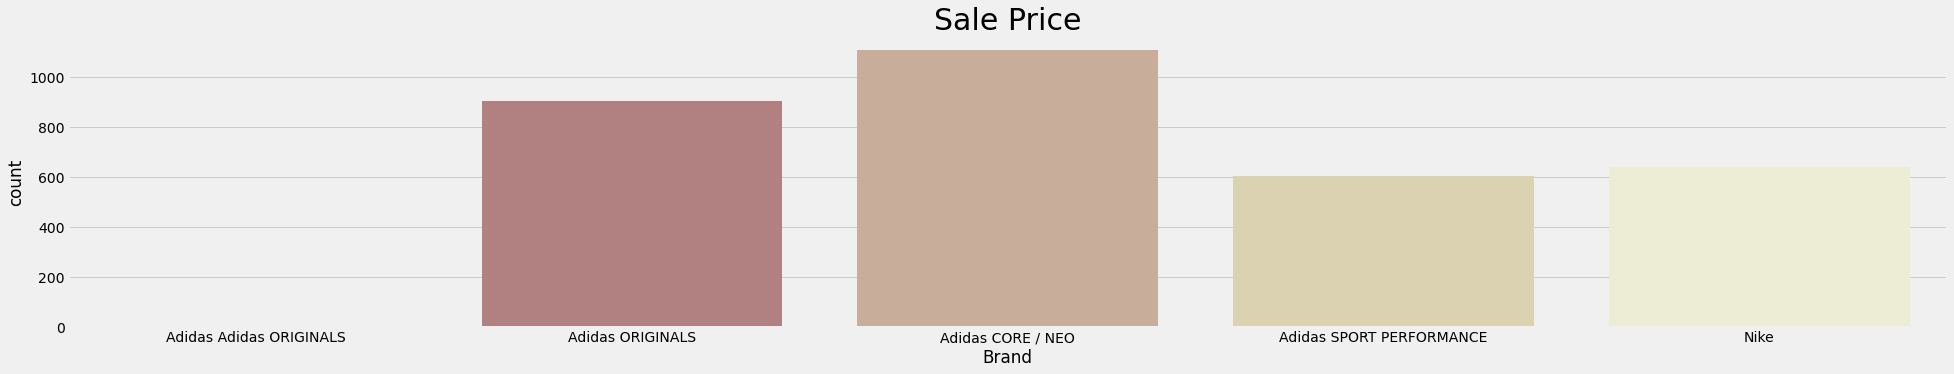

In [16]:
plt.rcParams['figure.figsize'] = (30, 5)
sns.countplot(df['Brand'], palette = 'pink')
plt.title('Sale Price', fontsize = 30)
plt.show()


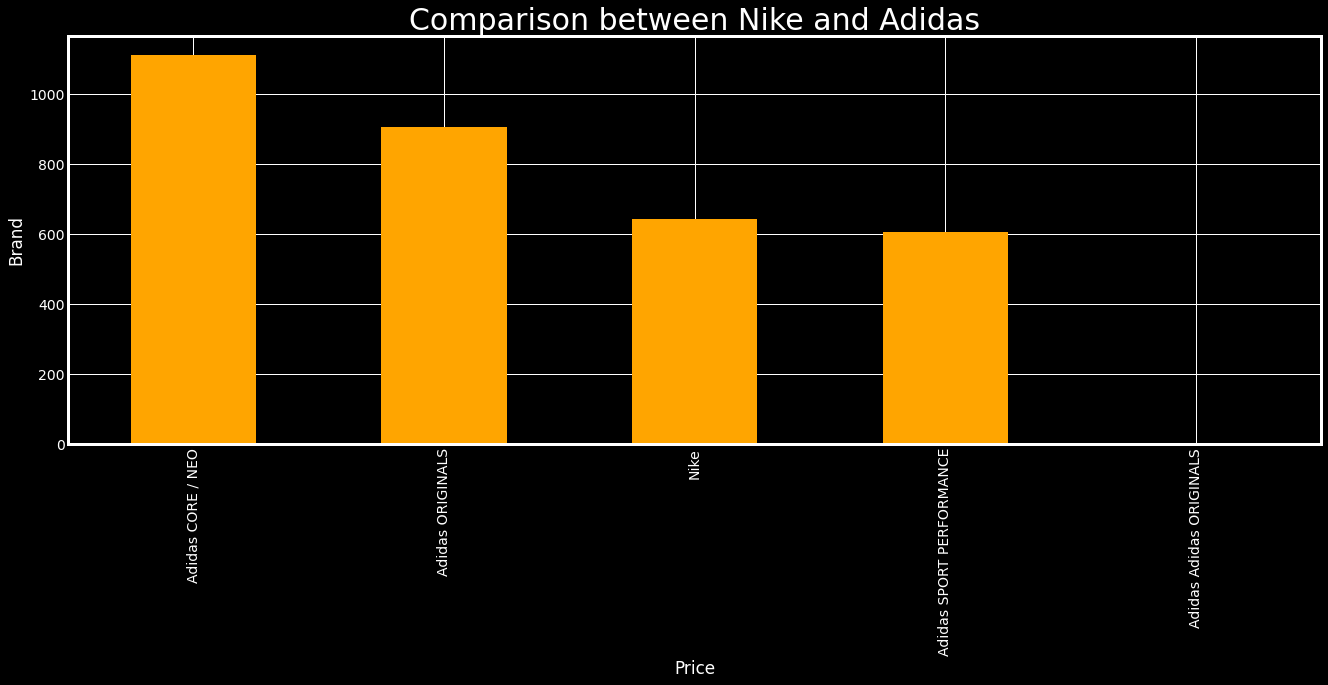

In [25]:
plt.style.use('dark_background')
df['Brand'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Comparison between Nike and Adidas', fontsize = 30, fontweight = 20)
plt.xlabel('Price')
plt.ylabel('Brand')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


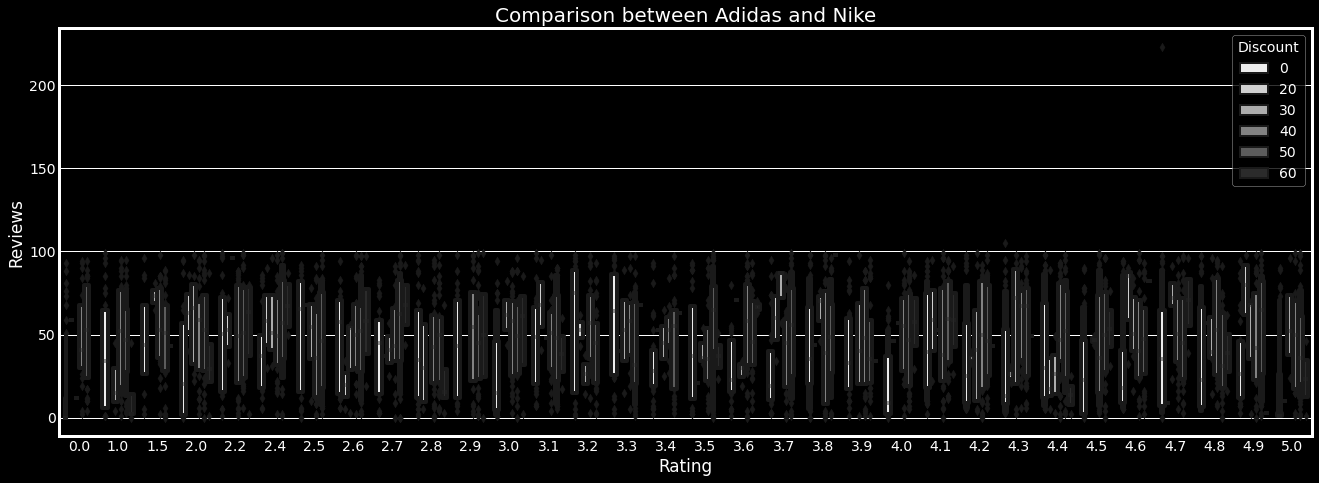

In [28]:
data_selected = pd.DataFrame(df, columns = df)
data_selected.columns

plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(df['Rating'], df['Reviews'], hue = df['Discount'], palette = 'Greys')
plt.title('Comparison between Adidas and Nike', fontsize = 20)
plt.show()

In [32]:
df.iloc[df.groupby(df['Rating'])['Reviews'].idxmax()][['Brand', 'Discount',
                                                               'Listing Price', 'Sale Price']].style.background_gradient('Reds')

,Brand,Discount,Listing Price,Sale Price
86,Adidas ORIGINALS,50,15999,7999
1568,Adidas ORIGINALS,0,7599,7599
1171,Adidas SPORT PERFORMANCE,40,2999,1799
1541,Adidas CORE / NEO,50,4999,2499
492,Adidas ORIGINALS,0,7599,7599
89,Adidas CORE / NEO,50,5299,2649
742,Adidas ORIGINALS,50,9999,4999
923,Adidas SPORT PERFORMANCE,40,7999,4799
1239,Adidas CORE / NEO,50,6999,3499
1629,Adidas SPORT PERFORMANCE,0,16999,16999


In [33]:
df['Brand'].value_counts().head()

Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Nike                         643
Adidas SPORT PERFORMANCE     606
Adidas Adidas ORIGINALS        1
Name: Brand, dtype: int64

In [38]:
df['Last Visited'].head()

0    2020-04-13T15:06:14
1    2020-04-13T15:06:15
2    2020-04-13T15:06:15
3    2020-04-13T15:06:15
4    2020-04-13T15:06:15
Name: Last Visited, dtype: object